Parcial 3\
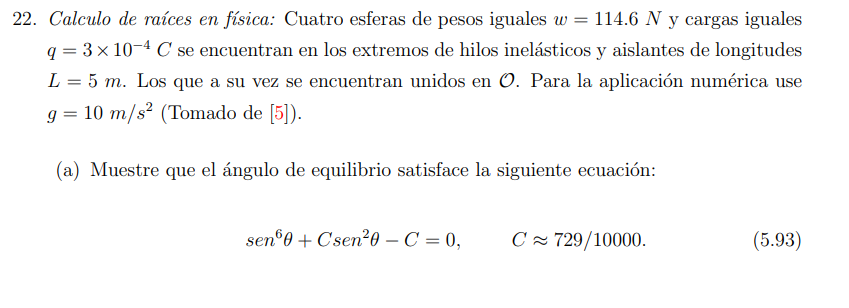\
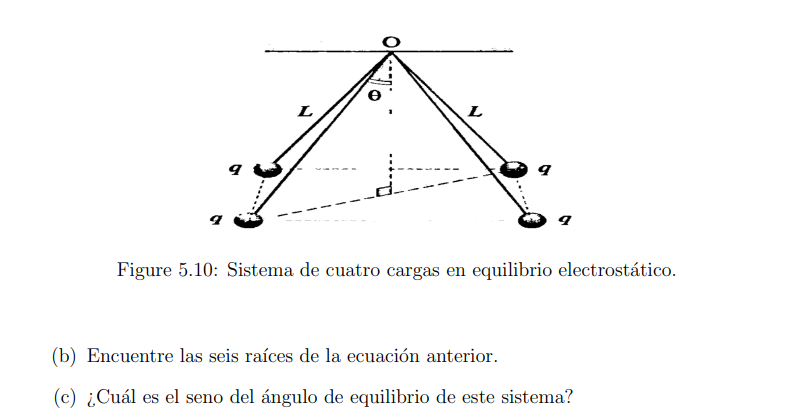

In [11]:
import numpy as np

In [12]:
G = np.array([lambda x:np.sin(x)**6,
              lambda x:(799/10000)*np.sin(x)**2,
              (799/10000)])

In [13]:
def GetF(G,r):
    
    n = r.shape[0]
    
    v = np.zeros_like(r)
    
    for i in range(n):
        v[i] = G[i](r[0],r[1],r[2])
        
    return v
def GetJacobian(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h
            
            J[i,j] = ( f[i](rf[0],rf[1],rf[2]) - f[i](rb[0],rb[1],rb[2])  )/(2*h)
            
    
    return J
def NewtonRaphson(G,r,itmax=1000,error=1e-9):
    
    it = 0
    d = 1.
    dvector = []
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = r
        
        F = GetF(G,rc)
        J = GetJacobian(G,rc)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
        
        diff = r - rc
        
        d = np.max( np.abs(diff) )
        
        dvector.append(d)
        print(dvector)
        
        it += 1
    
    print(it)
    return r,dvector
NewtonRaphson(G,np.array([0,0,0,]))

TypeError: <lambda>() takes 1 positional argument but 3 were given

Punto 23\
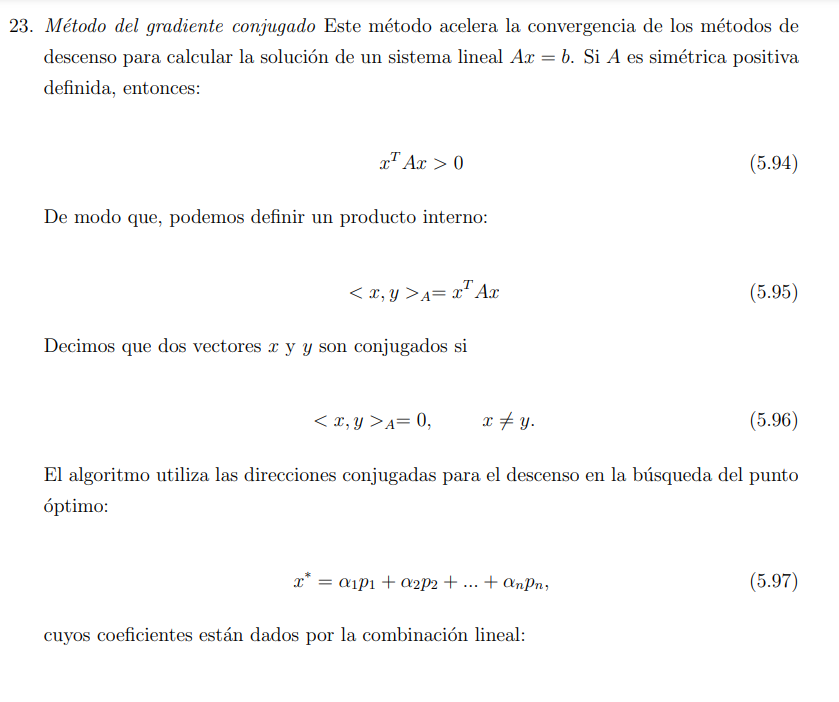\
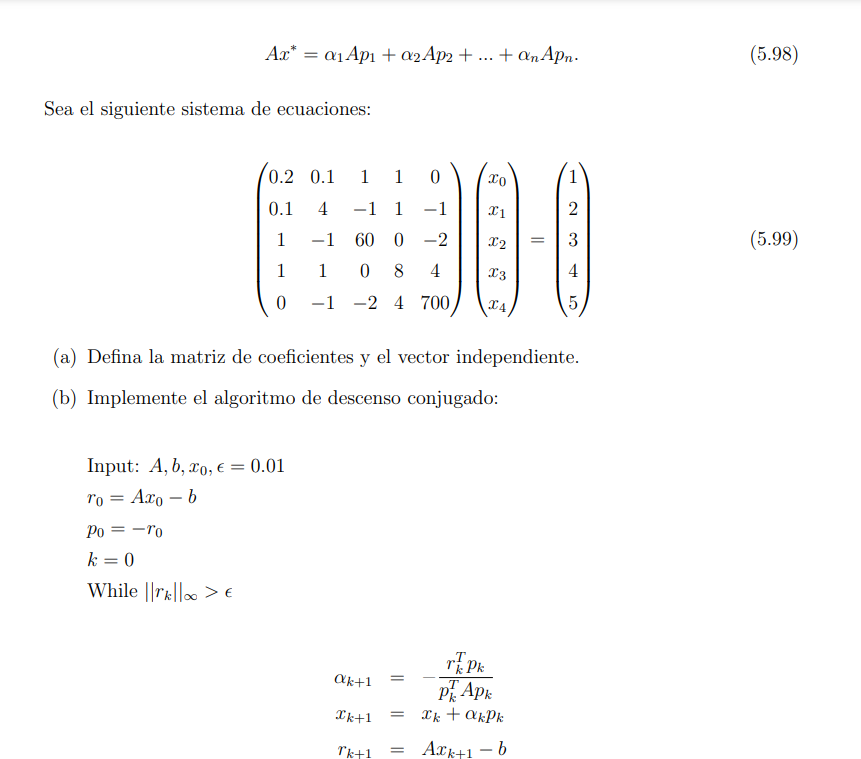\
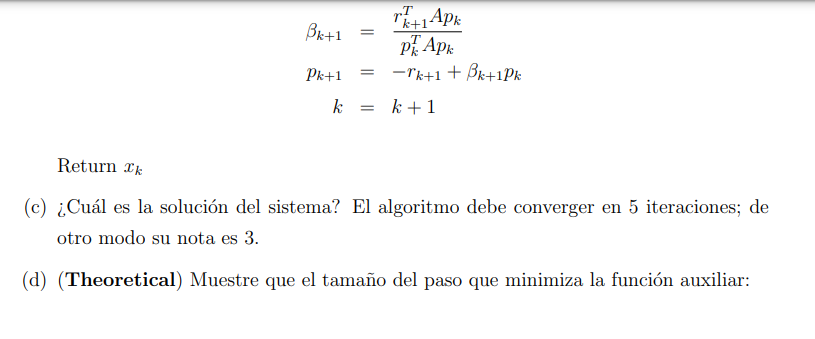\
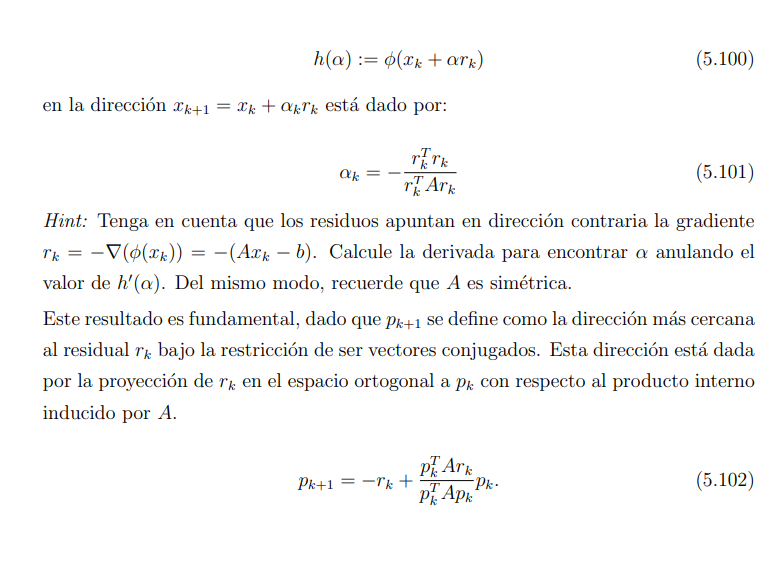

In [ ]:
matriz=np.array([[0.2,0.1,1,1,0],[0.1,4,-1,1,-1],[1,-1,60,0,-2],[1,1,0,8,4],[0,-1,-2,4,700]])
matriz

array([[ 2.e-01,  1.e-01,  1.e+00,  1.e+00,  0.e+00],
       [ 1.e-01,  4.e+00, -1.e+00,  1.e+00, -1.e+00],
       [ 1.e+00, -1.e+00,  6.e+01,  0.e+00, -2.e+00],
       [ 1.e+00,  1.e+00,  0.e+00,  8.e+00,  4.e+00],
       [ 0.e+00, -1.e+00, -2.e+00,  4.e+00,  7.e+02]])

In [ ]:
vectorind=np.array([1,2,3,4,5])
vectorind

array([1, 2, 3, 4, 5])

Algoritmo de descenso conjugado

In [ ]:
def descenso_conjugado(A,b,x0,epsilon=0.01):
    x=x0.copy()
    r=np.dot(A,x0)-b
    p=-r
    k=0
    residuo = np.max(np.abs(np.dot(A,x) - b))
    while  residuo>epsilon:
        alpha = -(np.dot(r.T,p))/(np.dot(np.dot(p.T, A),p))
        x = x+alpha *p
        r=np.dot(A,x)-b
        betha= (np.dot(np.dot(r.T,A),p))/(np.dot(np.dot(p.T, A),p))
        p=-r+betha*p
        residuo = np.max(np.abs(np.dot(A,x) - b))
        k+=1
    return x,k
descenso_conjugado(matriz,vectorind,np.zeros(5))

(array([ 7.85971308,  0.42292641, -0.07359224, -0.54064302,  0.01062616]), 5)